<h1><b>Importing and reading the data</b></h1>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot')
# pd.set_option('max_columns', 200)

In [3]:
#Defining the path to the Titanic folder
path = "/kaggle/input/titanic/"

#Loading the CSV files into DataFrames
gender_submission_df = pd.read_csv(path + "gender_submission.csv")
train_df = pd.read_csv(path + "train.csv")
test_df = pd.read_csv(path + "test.csv")

<h1><b>Step 1: Understanding the Data</b></h1>

In [4]:
#Checking the shape of each DataFrame

print("Gender Submission DataFrame shape:", gender_submission_df.shape)
print("train DataFrame shape:", train_df.shape)
print("test DataFrame shape:", test_df.shape)

Gender Submission DataFrame shape: (418, 2)
train DataFrame shape: (891, 12)
test DataFrame shape: (418, 11)


In [5]:
#Displaying the first few rows of each DataFrame
print("First 5 rows of Gender Submission DataFrame:")
print(gender_submission_df.head())
print("-"*70)

print("First 5 rows of Train DataFrame:")
print(train_df.head())
print("-"*70)

print("First 5 rows of Test DataFrame:")
print(test_df.head())
print("-"*70)

First 5 rows of Gender Submission DataFrame:
   PassengerId  Survived
0          892         0
1          893         1
2          894         0
3          895         0
4          896         1
----------------------------------------------------------------------
First 5 rows of Train DataFrame:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            T

In [6]:
#Displaying the columns for the above

print("Column for gender submission data_frame: ")
print(gender_submission_df.columns)
print(" ")

print("Column for train data_frame: ")
print(train_df.columns)
print(" ")

print("Column for test data_frame: ")
print(test_df.columns)
print(" ")

Column for gender submission data_frame: 
Index(['PassengerId', 'Survived'], dtype='object')
 
Column for train data_frame: 
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
 
Column for test data_frame: 
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
 


In [7]:
#Finding out what d_type Pandas has discovered for each

print("d_type for gender submission data_frame: ")
print(gender_submission_df.dtypes)
print(" ")

print("d_type for train data_frame: ")
print(train_df.dtypes)
print(" ")

print("d_type for test data_frame: ")
print(test_df.dtypes)
print(" ")

d_type for gender submission data_frame: 
PassengerId    int64
Survived       int64
dtype: object
 
d_type for train data_frame: 
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object
 
d_type for test data_frame: 
PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object
 


In [8]:
#Displaying numeric statistics about our data

print("d_type for gender submission data_frame: ")
print(gender_submission_df.describe())
print("-"*70)

print("d_type for train data_frame: ")
print(train_df.describe())
print(("-"*70))

print("d_type for test data_frame: ")
print(test_df.describe())
print(("-"*70))

d_type for gender submission data_frame: 
       PassengerId    Survived
count   418.000000  418.000000
mean   1100.500000    0.363636
std     120.810458    0.481622
min     892.000000    0.000000
25%     996.250000    0.000000
50%    1100.500000    0.000000
75%    1204.750000    1.000000
max    1309.000000    1.000000
----------------------------------------------------------------------
d_type for train data_frame: 
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000

<h1><b>Step 2: Data Preparation</b></h1>

In [9]:
#Dropping irrelevant columns and rows(Cleaning the data)
#Displaying the first few rows of each DataFrame
print("First 5 rows of Gender Submission DataFrame:")
print(gender_submission_df.head())
print("-"*90)

print("First 5 rows of Train DataFrame:")
print(train_df.head())
print("-"*90)

print("First 5 rows of Test DataFrame:")
print(test_df.head())
print("-"*90)


First 5 rows of Gender Submission DataFrame:
   PassengerId  Survived
0          892         0
1          893         1
2          894         0
3          895         0
4          896         1
------------------------------------------------------------------------------------------
First 5 rows of Train DataFrame:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

 

In [10]:
print("Column for gender submission data_frame: ")
gender_submission_cleaned_df = gender_submission_df[['PassengerId', 'Survived']].copy()
print(gender_submission_cleaned_df)
print("-"*75)

print("Column for train data_frame: ")
train_cleaned_df = train_df[[#'PassengerId', 
    'Survived', 'Pclass', 
    #'Name', 
        'Sex', 'Age', 'SibSp',
       'Parch', #'Ticket', 
        'Fare', 
        #'Cabin', 
        'Embarked']].copy()
print(train_cleaned_df)
print("-"*75)

print("Column for test data_frame: ")
test_cleaned_df = test_df[['PassengerId', 'Pclass', #'Name', 
               'Sex', 'Age', 'SibSp', 'Parch',
       #'Ticket', 
               'Fare', 'Cabin', 'Embarked']].copy()
print(test_cleaned_df)
print("-"*75)

Column for gender submission data_frame: 
     PassengerId  Survived
0            892         0
1            893         1
2            894         0
3            895         0
4            896         1
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         0

[418 rows x 2 columns]
---------------------------------------------------------------------------
Column for train data_frame: 
     Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0           0       3    male  22.0      1      0   7.2500        S
1           1       1  female  38.0      1      0  71.2833        C
2           1       3  female  26.0      0      0   7.9250        S
3           1       1  female  35.0      1      0  53.1000        S
4           0       3    male  35.0      0      0   8.0500        S
..        ...     ...     ...   ...    ...    ...      ...      ...
886         0       2    mal

In [11]:
print("d_type for gender submission data_frame: ")
print(gender_submission_cleaned_df.dtypes)
print(" ")

print("d_type for train data_frame: ")
print(train_cleaned_df.dtypes)
print(" ")

print("d_type for test data_frame: ")
print(test_cleaned_df.dtypes)
print(" ")


d_type for gender submission data_frame: 
PassengerId    int64
Survived       int64
dtype: object
 
d_type for train data_frame: 
Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object
 
d_type for test data_frame: 
PassengerId      int64
Pclass           int64
Sex             object
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Cabin           object
Embarked        object
dtype: object
 


In [12]:
#Renaming our columns
print("Column for gender submission data_frame: ")
gender_submission_cleaned_df = gender_submission_cleaned_df.rename(columns = {'PassengerId': 'Passenger_Id',
                                                'Survived': 'Survival_Status'}) 
print(gender_submission_cleaned_df)
print("-"*75)

print("Column for train data_frame: ")
train_cleaned_df = train_cleaned_df.rename(columns = {'Survived': 'Survival_Status',
                                                       'Pclass' : 'Passenger_Class',
                                                        'Sex' : 'Gender',
                                                         'Age' : 'Passenger_Age',
                                                        'SibSp': 'Siblings_Spouses',
                                                        'Parch': 'Parents_Children',
                                                         'Fare': 'Ticket_Fare',
                                                        'Embarked':'Port_of_Embarkation'})
   
   
print(train_cleaned_df)
print("-"*75)

print("Column for test data_frame: ")
test_cleaned_df = test_cleaned_df.rename(columns = {'PassengerId': 'Passenger_Id', 
                                                    'Pclass': 'Passenger_Class',
                                                    'Sex': 'Gender', 
                                                    'Age': 'Passenger_Age', 
                                                    'SibSp': 'Siblings_Spouses', 
                                                    'Parch': 'Parents_Children',
                                                    'Fare': 'Ticket_Fare', 
                                                    'Cabin': 'Cabin_Number', 
                                                    'Embarked': 'Port_of_Embarkation',})
print(test_cleaned_df)
print("-"*75)

Column for gender submission data_frame: 
     Passenger_Id  Survival_Status
0             892                0
1             893                1
2             894                0
3             895                0
4             896                1
..            ...              ...
413          1305                0
414          1306                1
415          1307                0
416          1308                0
417          1309                0

[418 rows x 2 columns]
---------------------------------------------------------------------------
Column for train data_frame: 
     Survival_Status  Passenger_Class  Gender  Passenger_Age  \
0                  0                3    male           22.0   
1                  1                1  female           38.0   
2                  1                3  female           26.0   
3                  1                1  female           35.0   
4                  0                3    male           35.0   
..               ...    

In [13]:
#Checking if there arent any missing values:
print("d_type for gender submission data_frame: ")
print(gender_submission_cleaned_df.isna().sum())
print("-" * 90)

print("d_type for gender submission data_frame: ")
print(train_cleaned_df.isna().sum())
print("-" * 90)

print("d_type for gender submission data_frame: ")
print(test_cleaned_df.isna().sum())
print("-" * 90)

d_type for gender submission data_frame: 
Passenger_Id       0
Survival_Status    0
dtype: int64
------------------------------------------------------------------------------------------
d_type for gender submission data_frame: 
Survival_Status          0
Passenger_Class          0
Gender                   0
Passenger_Age          177
Siblings_Spouses         0
Parents_Children         0
Ticket_Fare              0
Port_of_Embarkation      2
dtype: int64
------------------------------------------------------------------------------------------
d_type for gender submission data_frame: 
Passenger_Id             0
Passenger_Class          0
Gender                   0
Passenger_Age           86
Siblings_Spouses         0
Parents_Children         0
Ticket_Fare              1
Cabin_Number           327
Port_of_Embarkation      0
dtype: int64
------------------------------------------------------------------------------------------


In [14]:
#Checking if there aren't any duplicates
print("Gender submission data_frame: ")
print(gender_submission_cleaned_df.loc[gender_submission_cleaned_df.duplicated()])
print("-" * 90)

print("Test data_frame: ")
print(test_cleaned_df.loc[test_cleaned_df.duplicated()])
print("-" * 90)

print("Train data_frame: ")
print(train_cleaned_df.loc[train_cleaned_df.duplicated()])
print("-" * 90)

Gender submission data_frame: 
Empty DataFrame
Columns: [Passenger_Id, Survival_Status]
Index: []
------------------------------------------------------------------------------------------
Test data_frame: 
Empty DataFrame
Columns: [Passenger_Id, Passenger_Class, Gender, Passenger_Age, Siblings_Spouses, Parents_Children, Ticket_Fare, Cabin_Number, Port_of_Embarkation]
Index: []
------------------------------------------------------------------------------------------
Train data_frame: 
     Survival_Status  Passenger_Class  Gender  Passenger_Age  \
47                 1                3  female            NaN   
76                 0                3    male            NaN   
77                 0                3    male            NaN   
87                 0                3    male            NaN   
95                 0                3    male            NaN   
..               ...              ...     ...            ...   
870                0                3    male           26.0 

In [15]:
print("Gender submission data_frame shape: ", gender_submission_df.shape)
print("train DataFrame shape:", train_df.shape)
print("test DataFrame shape:", test_df.shape)

Gender submission data_frame shape:  (418, 2)
train DataFrame shape: (891, 12)
test DataFrame shape: (418, 11)


In [16]:
#Checking if there arent any duplicated rows
print("Checking duplicates for gender submission data_frame shape: ")
duplicates = gender_submission_cleaned_df.loc[gender_submission_cleaned_df.duplicated(subset=['Survival_Status'], keep=False)].head(5)
print(duplicates)
print("-" * 90)


print("Checking duplicates for train data_frame shape: ")
duplicates = train_cleaned_df.loc[train_cleaned_df.duplicated(subset=['Parents_Children', 'Ticket_Fare', 'Gender'], keep=False)].head(5)
print(duplicates)
print("-" * 90)


print("Checking duplicates for test data_frame shape: ")
duplicates = test_cleaned_df.loc[test_cleaned_df.duplicated(subset=['Siblings_Spouses', 'Passenger_Age', 'Port_of_Embarkation'], keep=False)].head(5)
print(duplicates)
print("-" * 90)

Checking duplicates for gender submission data_frame shape: 
   Passenger_Id  Survival_Status
0           892                0
1           893                1
2           894                0
3           895                0
4           896                1
------------------------------------------------------------------------------------------
Checking duplicates for train data_frame shape: 
    Survival_Status  Passenger_Class  Gender  Passenger_Age  Siblings_Spouses  \
0                 0                3    male           22.0                 1   
2                 1                3  female           26.0                 0   
3                 1                1  female           35.0                 1   
4                 0                3    male           35.0                 0   
12                0                3    male           20.0                 0   

    Parents_Children  Ticket_Fare Port_of_Embarkation  
0                  0        7.250                   S  
2 

In [17]:
#Filtering and Querying my data above:
#Checking an example duplicate
print('gender submission data_frame: ')
Filter = gender_submission_cleaned_df.query('Survival_Status == 0')
print(Filter)
print("-" * 90)

print('train data_frame: ')
Filter = train_cleaned_df.query('Passenger_Age == 35.0' )
print(Filter)
print("-" * 90)

print('test data_frame: ')
Filter = test_cleaned_df.query('Siblings_Spouses')
print(Filter)
print("-" * 90)

gender submission data_frame: 
     Passenger_Id  Survival_Status
0             892                0
2             894                0
3             895                0
5             897                0
7             899                0
..            ...              ...
407          1299                0
413          1305                0
415          1307                0
416          1308                0
417          1309                0

[266 rows x 2 columns]
------------------------------------------------------------------------------------------
train data_frame: 
     Survival_Status  Passenger_Class  Gender  Passenger_Age  \
3                  1                1  female           35.0   
4                  0                3    male           35.0   
20                 0                2    male           35.0   
211                1                2  female           35.0   
230                1                1  female           35.0   
258                1           

In [18]:
print('Column for gender submission data_frame: ')
print(gender_submission_cleaned_df.columns)
print("-" * 90)

print('Column for gender submission data_frame: ')
print(train_cleaned_df.columns)
print("-" * 90)

print('Column for gender submission data_frame: ')
print(test_cleaned_df.columns)
print("-" * 90)

Column for gender submission data_frame: 
Index(['Passenger_Id', 'Survival_Status'], dtype='object')
------------------------------------------------------------------------------------------
Column for gender submission data_frame: 
Index(['Survival_Status', 'Passenger_Class', 'Gender', 'Passenger_Age',
       'Siblings_Spouses', 'Parents_Children', 'Ticket_Fare',
       'Port_of_Embarkation'],
      dtype='object')
------------------------------------------------------------------------------------------
Column for gender submission data_frame: 
Index(['Passenger_Id', 'Passenger_Class', 'Gender', 'Passenger_Age',
       'Siblings_Spouses', 'Parents_Children', 'Ticket_Fare', 'Cabin_Number',
       'Port_of_Embarkation'],
      dtype='object')
------------------------------------------------------------------------------------------


In [19]:
# Checking if there aren't any duplicated rows
def check_duplicates(df, subset_columns, df_name):
    print(f"Checking duplicated rows for {df_name}:")
    # Check if the subset columns exist in the DataFrame
    missing_columns = [col for col in subset_columns if col not in df.columns]
    
    if missing_columns:
        print(f"Error: Missing columns {missing_columns} in {df_name}")
    else:
        duplicates = df.duplicated(subset=subset_columns).sum()
        print(f"Number of duplicates: {duplicates}")
    print("-" * 90)

# Gender submission DataFrame
check_duplicates(gender_submission_cleaned_df, ['Survival_Status'], 'gender submission data_frame')

# Train DataFrame
check_duplicates(train_cleaned_df, ['Parents_Children', 'Ticket_Fare', 'Gender'], 'train data_frame')

# Test DataFrame
check_duplicates(test_cleaned_df, ['Siblings_Spouses', 'Passenger_Age', 'Port_of_Embarkation'], 'test data_frame')


Checking duplicated rows for gender submission data_frame:
Number of duplicates: 416
------------------------------------------------------------------------------------------
Checking duplicated rows for train data_frame:
Number of duplicates: 486
------------------------------------------------------------------------------------------
Checking duplicated rows for test data_frame:
Number of duplicates: 231
------------------------------------------------------------------------------------------


In [20]:
#Cleaning up duplicates in each DataFrame

print("Gender submission data_frame: ")
gender_submission_cleaned_df = gender_submission_cleaned_df.loc[~gender_submission_cleaned_df.duplicated(subset=['Survival_Status'])] \
     .reset_index(drop=True).copy()
print(gender_submission_cleaned_df)
print('-' * 90)

print("Train data_frame: ")
train_cleaned_df = train_cleaned_df.loc[~train_cleaned_df.duplicated(subset=['Passenger_Class', 'Passenger_Age', 'Ticket_Fare'])] \
     .reset_index(drop=True).copy()
print(train_cleaned_df)
print('-' * 90)

print("Test data_frame: ")
test_cleaned_df = test_cleaned_df.loc[~test_cleaned_df.duplicated(subset=['Ticket_Fare', 'Cabin_Number', 'Port_of_Embarkation'])] \
     .reset_index(drop=True).copy()
print(test_cleaned_df)
print('-' * 90)

Gender submission data_frame: 
   Passenger_Id  Survival_Status
0           892                0
1           893                1
------------------------------------------------------------------------------------------
Train data_frame: 
     Survival_Status  Passenger_Class  Gender  Passenger_Age  \
0                  0                3    male           22.0   
1                  1                1  female           38.0   
2                  1                3  female           26.0   
3                  1                1  female           35.0   
4                  0                3    male           35.0   
..               ...              ...     ...            ...   
707                0                2    male           28.0   
708                0                3  female           39.0   
709                1                1  female           19.0   
710                1                1    male           26.0   
711                0                3    male           

In [21]:
print("Gender submission data_frame shape: ", gender_submission_cleaned_df.shape)
print("train DataFrame shape:", train_cleaned_df.shape)
print("test DataFrame shape:", test_cleaned_df.shape)

Gender submission data_frame shape:  (2, 2)
train DataFrame shape: (712, 8)
test DataFrame shape: (208, 9)


<h1><b>Step 3: Feature Understanding</b></h1>

* Plotting Feature Distributions
* Histogram
* KDE
* Boxplot

In [22]:
print("Gender submission data_frame shape: ", gender_submission_cleaned_df)
print('-' * 90)
print("train DataFrame shape:", train_cleaned_df)
print('-' * 90)
print("test DataFrame shape:", test_cleaned_df)
print('-' * 90)

Gender submission data_frame shape:     Passenger_Id  Survival_Status
0           892                0
1           893                1
------------------------------------------------------------------------------------------
train DataFrame shape:      Survival_Status  Passenger_Class  Gender  Passenger_Age  \
0                  0                3    male           22.0   
1                  1                1  female           38.0   
2                  1                3  female           26.0   
3                  1                1  female           35.0   
4                  0                3    male           35.0   
..               ...              ...     ...            ...   
707                0                2    male           28.0   
708                0                3  female           39.0   
709                1                1  female           19.0   
710                1                1    male           26.0   
711                0                3    male 

In [23]:
#value_counts

print(gender_submission_cleaned_df['Passenger_Id'].value_counts())
print('-' * 90)
print(train_cleaned_df['Passenger_Age'].value_counts())
print('-' * 90)
print(test_cleaned_df['Cabin_Number'].value_counts())
print('-' * 90)

Passenger_Id
892    1
893    1
Name: count, dtype: int64
------------------------------------------------------------------------------------------
Passenger_Age
24.00    27
18.00    23
22.00    21
21.00    21
30.00    21
         ..
36.50     1
0.92      1
23.50     1
55.50     1
74.00     1
Name: count, Length: 88, dtype: int64
------------------------------------------------------------------------------------------
Cabin_Number
C101    2
C78     2
B45     1
C89     1
B69     1
       ..
C6      1
G6      1
A29     1
F       1
C105    1
Name: count, Length: 76, dtype: int64
------------------------------------------------------------------------------------------


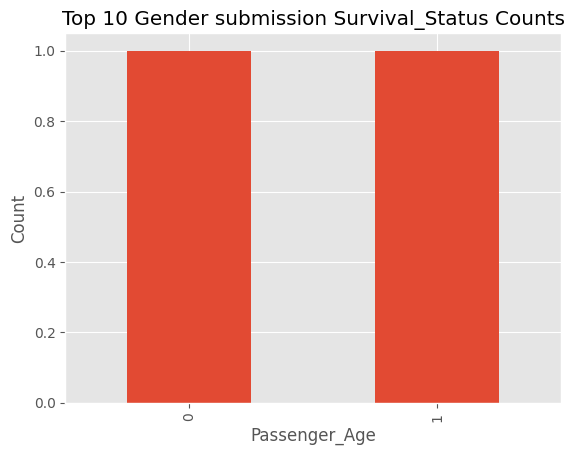

In [24]:
ax = gender_submission_cleaned_df['Survival_Status'].value_counts()\
      .head(10)\
      .plot(kind='bar', title='Top 10 Gender submission Survival_Status Counts')
ax.set_xlabel('Passenger_Age')
ax.set_ylabel('Count')
plt.show()

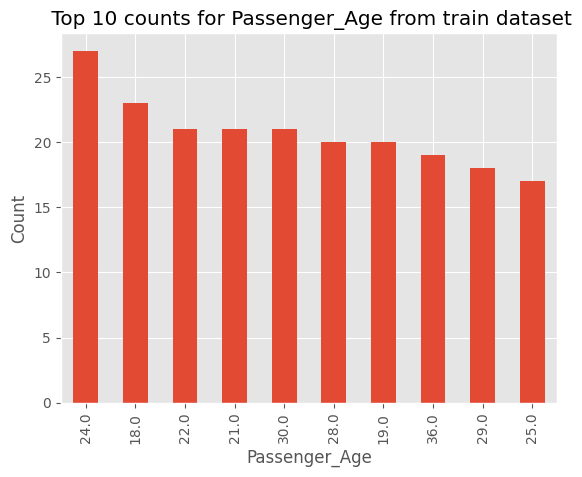

In [25]:
ax = train_cleaned_df['Passenger_Age'].value_counts()\
      .head(10)\
      .plot(kind='bar', title=' Top 10 counts for Passenger_Age from train dataset')
ax.set_xlabel('Passenger_Age')
ax.set_ylabel('Count')
plt.show()

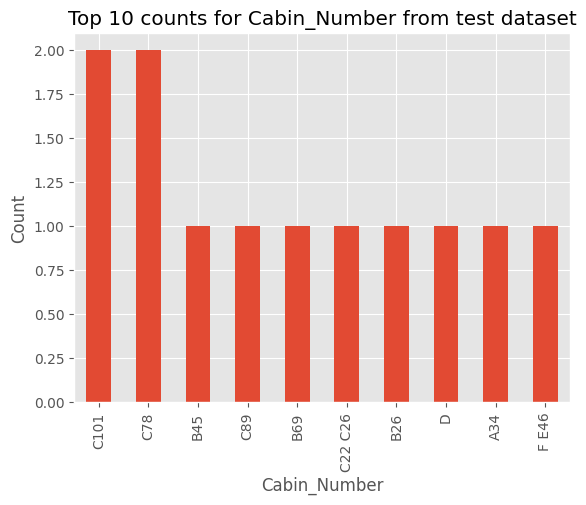

In [26]:
ax = test_cleaned_df['Cabin_Number'].value_counts()\
      .head(10)\
      .plot(kind='bar', title='Top 10 counts for Cabin_Number from test dataset')
ax.set_xlabel('Cabin_Number')
ax.set_ylabel('Count')
plt.show()

In [27]:
print(gender_submission_cleaned_df)
print('-' * 90)
print(train_cleaned_df)
print('-' * 90)
print(test_cleaned_df)
print('-' * 90)

   Passenger_Id  Survival_Status
0           892                0
1           893                1
------------------------------------------------------------------------------------------
     Survival_Status  Passenger_Class  Gender  Passenger_Age  \
0                  0                3    male           22.0   
1                  1                1  female           38.0   
2                  1                3  female           26.0   
3                  1                1  female           35.0   
4                  0                3    male           35.0   
..               ...              ...     ...            ...   
707                0                2    male           28.0   
708                0                3  female           39.0   
709                1                1  female           19.0   
710                1                1    male           26.0   
711                0                3    male           32.0   

     Siblings_Spouses  Parents_Children  

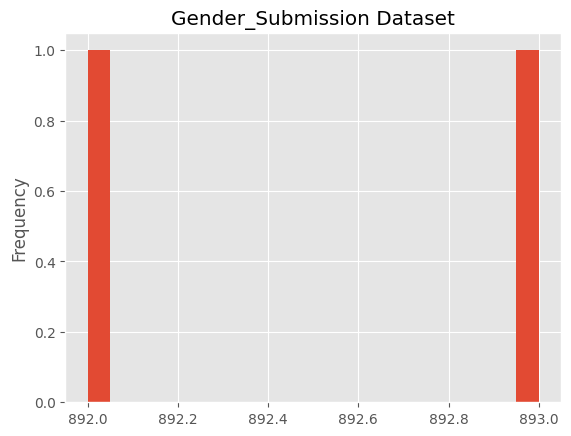

In [28]:
ax = gender_submission_cleaned_df['Passenger_Id'].plot(kind = 'hist',
                                                       bins = 20,
                                                       title = 'Gender_Submission Dataset')
ax.set_label('Passenger_Id')
plt.show()

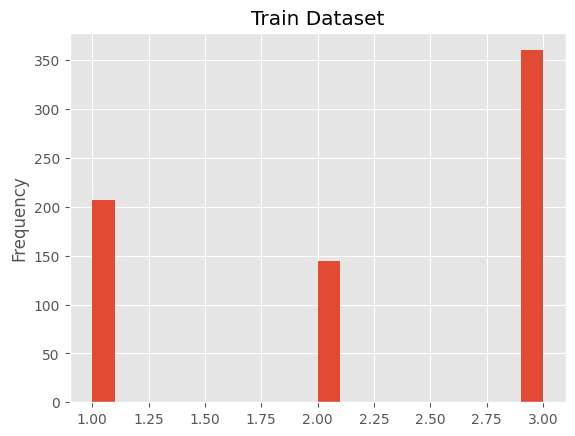

In [29]:
ax = train_cleaned_df['Passenger_Class'].plot(kind = 'hist',
                                              bins = 20,
                                              title = 'Train Dataset')
ax.set_label('Passenger_Class')
plt.show()

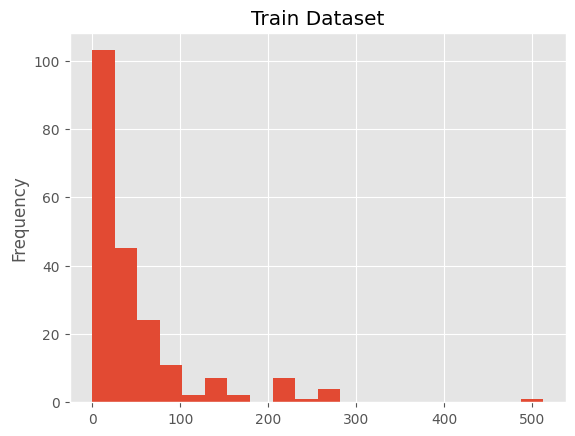

In [30]:
ax = test_cleaned_df['Ticket_Fare'].plot(kind = 'hist',
                                         bins = 20,
                                         title = 'Train Dataset')
ax.set_label('Ticket_Fare')
plt.show()

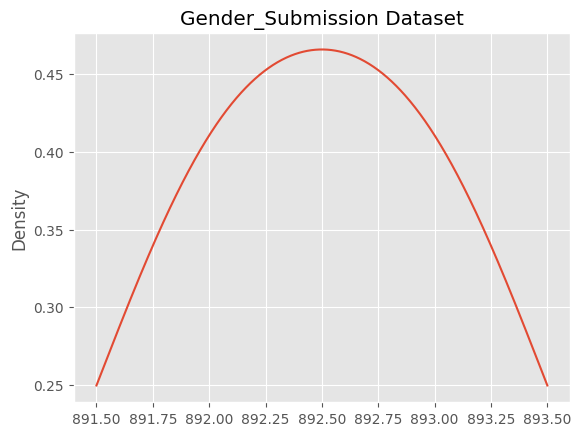

In [31]:
ax = gender_submission_cleaned_df['Passenger_Id'].plot(kind = 'kde',
                                                      title = 'Gender_Submission Dataset')
ax.set_label('Passenger_Id')
plt.show()

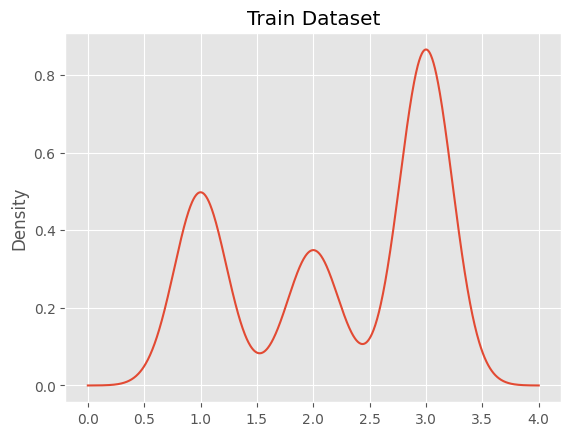

In [32]:
ax = train_cleaned_df['Passenger_Class'].plot(kind = 'kde',
                                         title = 'Train Dataset')
ax.set_label('Passenger_Class')
plt.show()

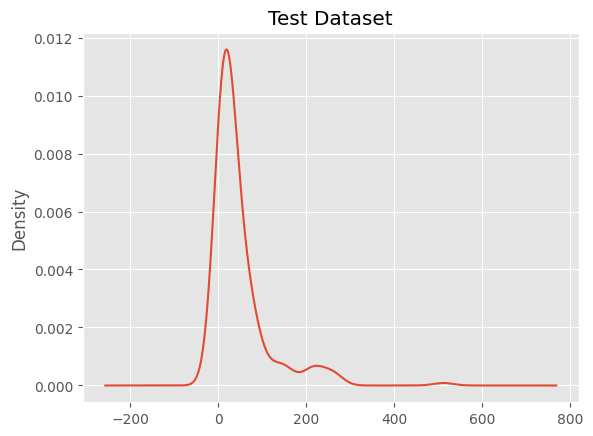

In [33]:
ax = test_cleaned_df['Ticket_Fare'].plot(kind = 'kde',
                                         title = 'Test Dataset')
ax.set_label('Ticket_Fare')
plt.show()

<h1><b>Step 4: Feature Relationships</b></h1>

* Heatmap Correlation
* Scatterplot
* Pairplot
* Groupby Comparison

In [34]:
print(gender_submission_cleaned_df)
print('-' * 90)
print(train_cleaned_df)
print('-' * 90)
print(test_cleaned_df)
print('-' * 90)

   Passenger_Id  Survival_Status
0           892                0
1           893                1
------------------------------------------------------------------------------------------
     Survival_Status  Passenger_Class  Gender  Passenger_Age  \
0                  0                3    male           22.0   
1                  1                1  female           38.0   
2                  1                3  female           26.0   
3                  1                1  female           35.0   
4                  0                3    male           35.0   
..               ...              ...     ...            ...   
707                0                2    male           28.0   
708                0                3  female           39.0   
709                1                1  female           19.0   
710                1                1    male           26.0   
711                0                3    male           32.0   

     Siblings_Spouses  Parents_Children  

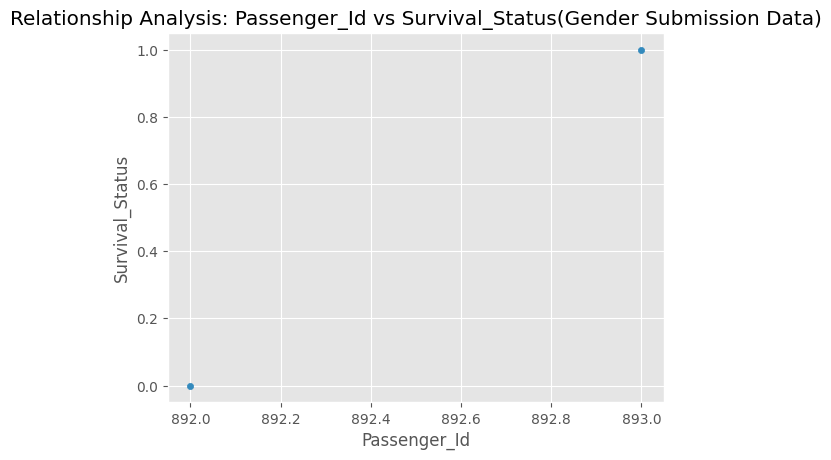

In [35]:
#Scatterplot Analysis
gender_submission_cleaned_df.plot(kind= 'scatter',
                            x = 'Passenger_Id',
                            y = 'Survival_Status',
                            title = 'Relationship Analysis: Passenger_Id vs Survival_Status(Gender Submission Data)')
plt.show()

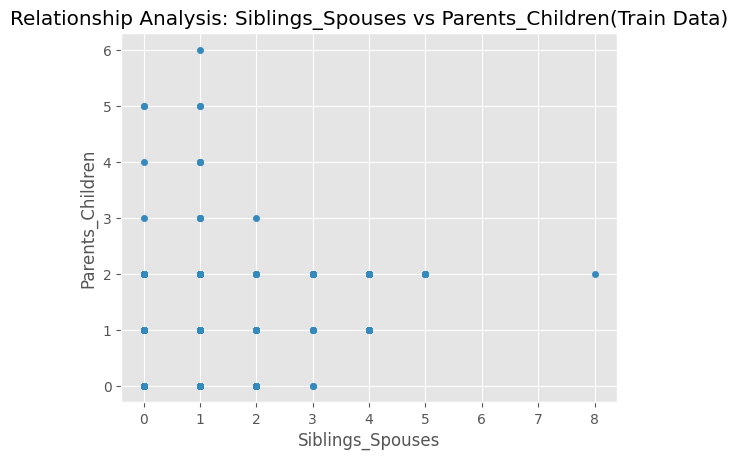

In [36]:
#Scatterplot
train_cleaned_df.plot(kind= 'scatter',
                       x = 'Siblings_Spouses',
                       y = 'Parents_Children',
                       title = 'Relationship Analysis: Siblings_Spouses vs Parents_Children(Train Data)')
plt.show()

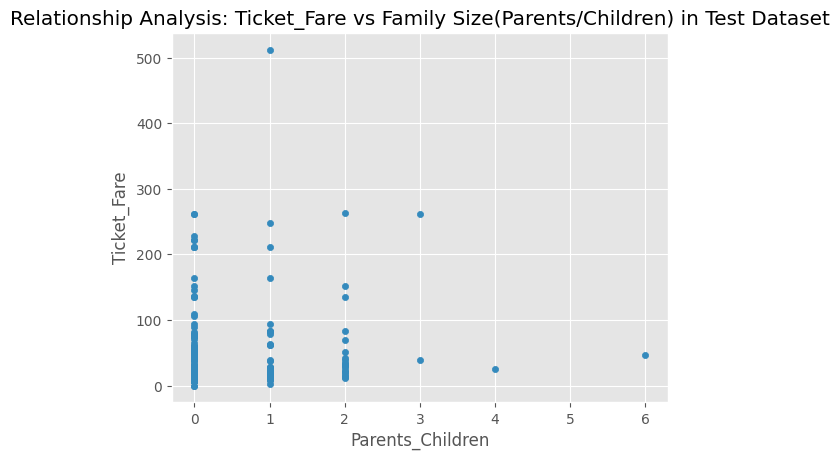

In [37]:
#Scatterplot
test_cleaned_df.plot(kind= 'scatter',
                            x = 'Parents_Children',
                            y = 'Ticket_Fare',
                            title = 'Relationship Analysis: Ticket_Fare vs Family Size(Parents/Children) in Test Dataset')
plt.show()

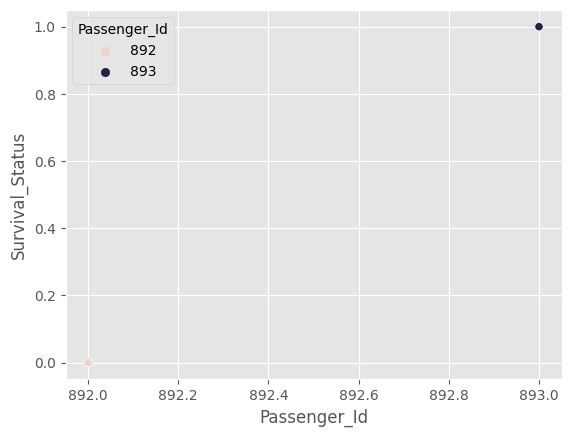

In [38]:
#With a hue included

sns.scatterplot(x = 'Passenger_Id',
                y = 'Survival_Status',
                hue ='Passenger_Id',
                data = gender_submission_cleaned_df)
plt.show()

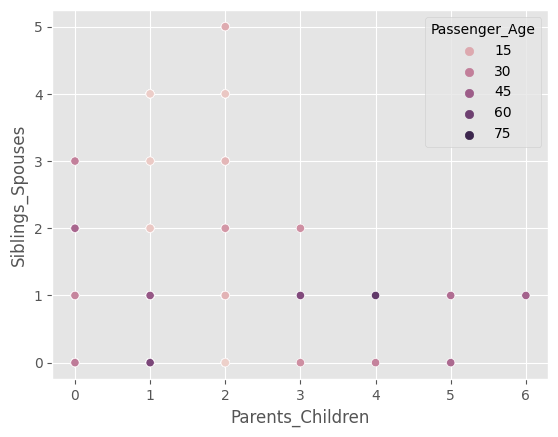

In [39]:
sns.scatterplot(y = 'Siblings_Spouses',
                x = 'Parents_Children',
                hue = 'Passenger_Age',
                data = train_cleaned_df)
plt.show()

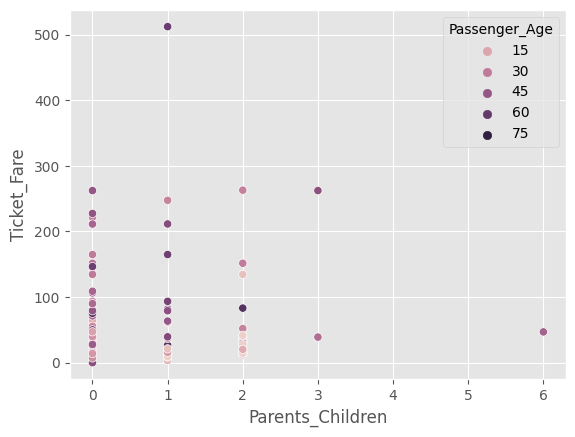

In [40]:
sns.scatterplot(x = 'Parents_Children',
                y = 'Ticket_Fare',
                hue = 'Passenger_Age',
                data = test_cleaned_df)
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated a

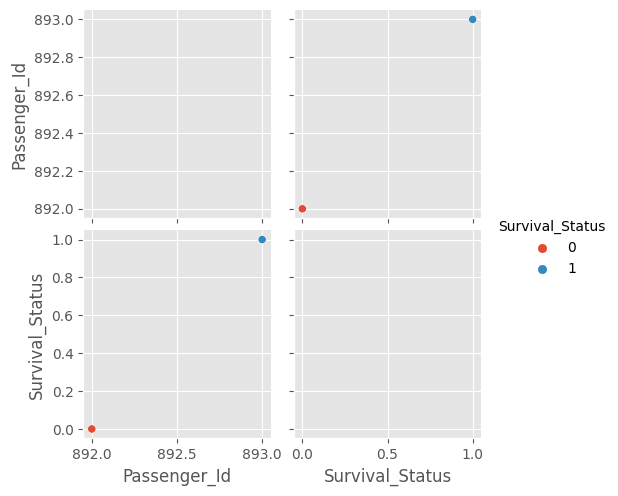

In [41]:
#Pairplot

sns.pairplot(data=gender_submission_cleaned_df,
         vars=['Passenger_Id', 'Survival_Status'],
         hue = 'Survival_Status')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

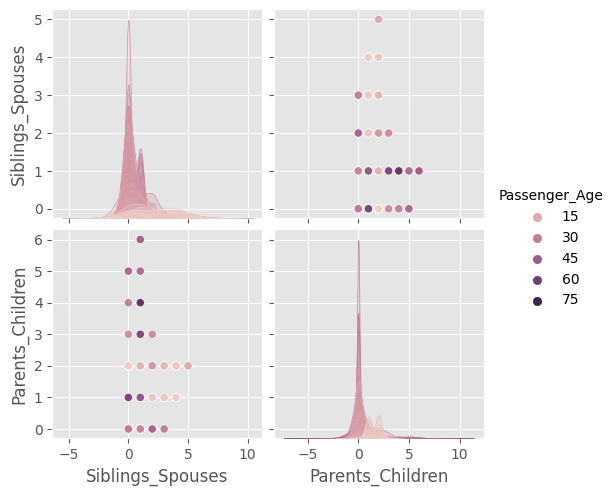

In [42]:
sns.pairplot(data = train_cleaned_df,
                vars = ['Siblings_Spouses','Parents_Children'],
                hue = 'Passenger_Age')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

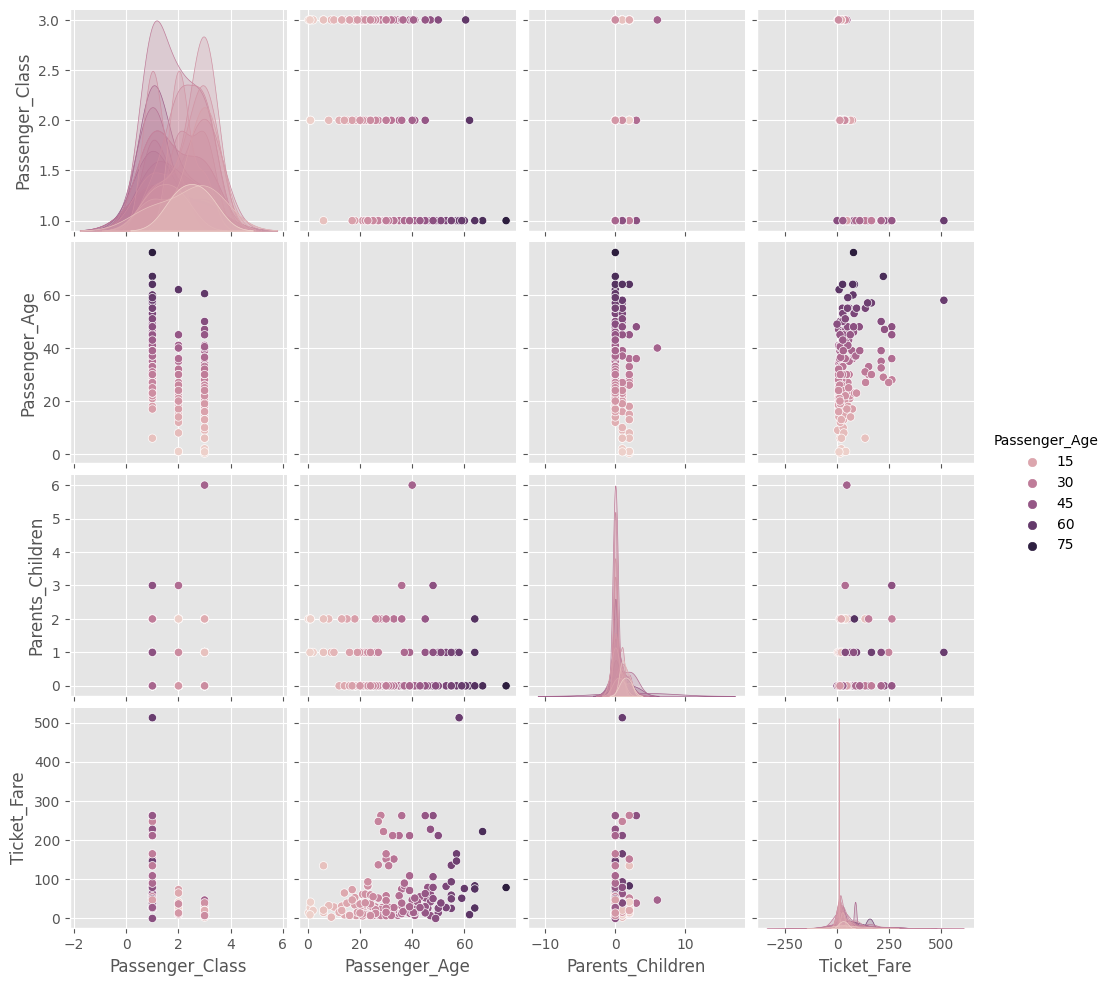

In [43]:
sns.pairplot(data = test_cleaned_df,
             vars =['Passenger_Class',
                     'Passenger_Age',
                      'Parents_Children','Ticket_Fare'],
              hue = 'Passenger_Age')
plt.show()

In [44]:
#Heatmap Correlation
gender_submission_cleaned_df = gender_submission_cleaned_df[['Passenger_Id', 'Survival_Status']].dropna().corr()

<Axes: >

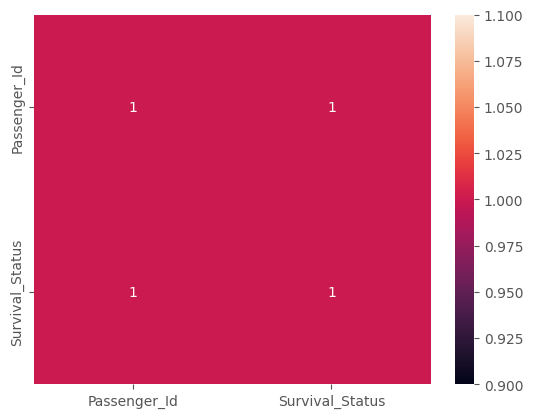

In [45]:
sns.heatmap(gender_submission_cleaned_df, annot=True)

In [46]:
train_cleaned_df = train_cleaned_df[['Passenger_Class', 
                                    'Passenger_Age',
                                    'Siblings_Spouses',
                                    'Parents_Children',
                                    'Ticket_Fare']].dropna().corr()

<Axes: >

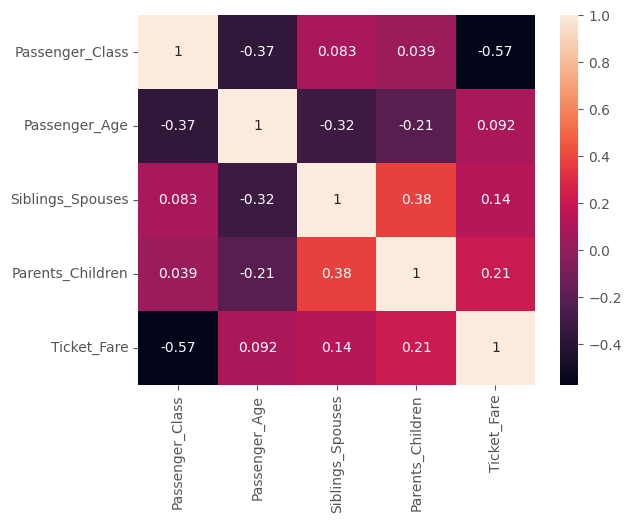

In [47]:
sns.heatmap(train_cleaned_df, annot=True)

In [48]:
test_cleaned_df = test_cleaned_df[['Passenger_Id', 
                                    'Passenger_Age',
                                    'Parents_Children',
                                    'Ticket_Fare']].dropna().corr()

<Axes: >

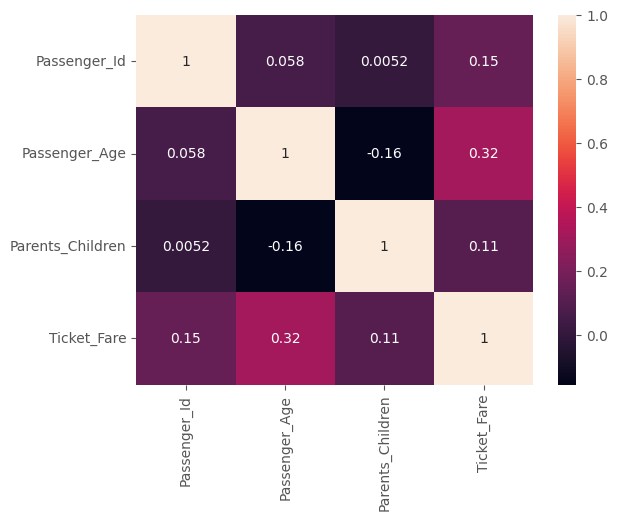

In [49]:
sns.heatmap(test_cleaned_df, annot=True)

<h1><b>Questions And Visualisation</b></h1>

In [50]:
#What is the relationship between Passenger_Age and Survival_Status under trained data?
print(train_cleaned_df.columns)

Index(['Passenger_Class', 'Passenger_Age', 'Siblings_Spouses',
       'Parents_Children', 'Ticket_Fare'],
      dtype='object')


In [51]:
print(train_cleaned_df['Passenger_Age'].isnull().sum())

0


In [53]:
#option 1: Drop rows with null values
train_cleaned_df = train_cleaned_df.dropna(subset=['Passenger_Age'])

#option 2: Fill null values with specific value(e.g., mean or median)
train_cleaned_df['Passenger_Age'] = train_cleaned_df['Passenger_Age'].fillna(train_cleaned_df['Passenger_Age'].mean())

In [54]:
#Verifying DataTypes
print(train_cleaned_df.dtypes)

Passenger_Class     float64
Passenger_Age       float64
Siblings_Spouses    float64
Parents_Children    float64
Ticket_Fare         float64
dtype: object


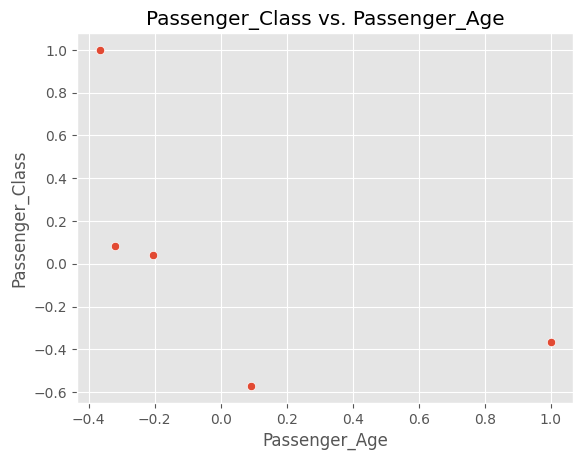

In [55]:
#Plot Again
sns.scatterplot(data=train_cleaned_df, x='Passenger_Age', y='Passenger_Class')
plt.title('Passenger_Class vs. Passenger_Age')
plt.show()
